In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv('exoplanet_data.csv', on_bad_lines='skip',comment = '#')
df

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,7 CMa c,7 CMa,1,1,2,Radial Velocity,2019,Multiple Observatories,Published Confirmed,0,...,-0.03,1.564,0.252,-0.252,3.67853,0.004135,-0.004135,2019-10-18,2019-11,2019-10-24
1,7 CMa c,7 CMa,0,1,2,Radial Velocity,2019,Multiple Observatories,Published Confirmed,0,...,-0.03,1.564,0.252,-0.252,3.67853,0.004135,-0.004135,2024-09-13,2024-07,2024-09-13
2,DMPP-1 b,DMPP-1,1,1,4,Radial Velocity,2019,La Silla Observatory,Published Confirmed,0,...,-0.03,6.690,0.024,-0.024,7.85032,0.000290,-0.000290,2020-01-23,2019-12,2020-01-30
3,DMPP-1 c,DMPP-1,1,1,4,Radial Velocity,2019,La Silla Observatory,Published Confirmed,0,...,-0.03,6.690,0.024,-0.024,7.85032,0.000290,-0.000290,2020-01-23,2019-12,2020-01-30
4,DMPP-1 d,DMPP-1,1,1,4,Radial Velocity,2019,La Silla Observatory,Published Confirmed,0,...,-0.03,6.690,0.024,-0.024,7.85032,0.000290,-0.000290,2020-01-23,2019-12,2020-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,bet Pic c,bet Pic,1,1,2,Radial Velocity,2019,La Silla Observatory,Published Confirmed,0,...,-0.03,3.526,0.222,-0.222,3.82015,0.004427,-0.004427,2023-06-12,2022-09,2023-06-12
563,bet Pic c,bet Pic,0,1,2,Radial Velocity,2019,La Silla Observatory,Published Confirmed,0,...,-0.03,3.526,0.222,-0.222,3.82015,0.004427,-0.004427,2025-09-25,2020-10,2025-09-25
564,bet Pic c,bet Pic,0,1,2,Radial Velocity,2019,La Silla Observatory,Published Confirmed,0,...,-0.03,3.526,0.222,-0.222,3.82015,0.004427,-0.004427,2019-08-23,2019-08,2019-08-29
565,eps Ind A b,eps Ind A,0,3,1,Radial Velocity,2019,La Silla Observatory,Published Confirmed,0,...,-0.03,2.237,0.240,-0.240,4.34562,0.007374,-0.007374,2019-10-18,2019-12,2019-10-24


In [11]:
df.shape

(567, 92)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          567 non-null    object 
 1   hostname         567 non-null    object 
 2   default_flag     567 non-null    int64  
 3   sy_snum          567 non-null    int64  
 4   sy_pnum          567 non-null    int64  
 5   discoverymethod  567 non-null    object 
 6   disc_year        567 non-null    int64  
 7   disc_facility    567 non-null    object 
 8   soltype          567 non-null    object 
 9   pl_controv_flag  567 non-null    int64  
 10  pl_refname       567 non-null    object 
 11  pl_orbper        493 non-null    float64
 12  pl_orbpererr1    480 non-null    float64
 13  pl_orbpererr2    480 non-null    float64
 14  pl_orbperlim     493 non-null    float64
 15  pl_orbsmax       309 non-null    float64
 16  pl_orbsmaxerr1   288 non-null    float64
 17  pl_orbsmaxerr2  

In [13]:
# I dont know columns = rastr, sy_vmag, ttv_flagg, st_metratio, and decstr

In [14]:
# 1) pl_name = planet name
#    planet name most commonly used in literature
# 2) hostname = host name
#    stellar name most commonly used in literature
# 3) discoverymethod = discovery method
#    method by which the planet was first identified
# 4) st_spectype = spectral type
#    classification of the star based on their spectral characteristics following
#    the Morgan-Keenan system
# 5) pl_eqt = equilibrium temperature [K]
#    equilibrium temperature of the planet as modeled by a black body heated only
#    by its host star
# 6) pl_bmassj = planet mass or mass*sin(i) [Jupiter mass]
#    best planet mass estimate available, in order of preference

In [19]:
df_small = df[['pl_name', 'hostname', 'discoverymethod', 'st_spectype', 'pl_eqt', 'pl_bmassj']]
df_small = df_small.dropna()
df_small

,pl_name,hostname,discoverymethod,st_spectype,pl_eqt,pl_bmassj
2,DMPP-1 b,DMPP-1,Radial Velocity,F8 V,877.0,0.076362
3,DMPP-1 c,DMPP-1,Radial Velocity,F8 V,1239.0,0.030205
4,DMPP-1 d,DMPP-1,Radial Velocity,F8 V,1632.0,0.010540
5,DMPP-1 e,DMPP-1,Radial Velocity,F8 V,1314.0,0.012994
6,DMPP-2 b,DMPP-2,Radial Velocity,F5 V,1000.0,0.437000
...,...,...,...,...,...,...
546,WASP-185 b,WASP-185,Transit,G0 V,1160.0,0.980000
549,WASP-190 b,WASP-190,Transit,F6 IV-V,1500.0,1.000000
555,WASP-192 b,WASP-192,Transit,G0 V,1620.0,2.300000
561,XO-7 b,XO-7,Transit,G0 V,1743.0,0.709000


In [20]:
df_small.shape

(67, 6)

In [21]:
df_small.head(5)

,pl_name,hostname,discoverymethod,st_spectype,pl_eqt,pl_bmassj
2,DMPP-1 b,DMPP-1,Radial Velocity,F8 V,877.0,0.076362
3,DMPP-1 c,DMPP-1,Radial Velocity,F8 V,1239.0,0.030205
4,DMPP-1 d,DMPP-1,Radial Velocity,F8 V,1632.0,0.010540
5,DMPP-1 e,DMPP-1,Radial Velocity,F8 V,1314.0,0.012994
6,DMPP-2 b,DMPP-2,Radial Velocity,F5 V,1000.0,0.437000


In [22]:
df_small.tail(5)

,pl_name,hostname,discoverymethod,st_spectype,pl_eqt,pl_bmassj
546,WASP-185 b,WASP-185,Transit,G0 V,1160.0,0.980
549,WASP-190 b,WASP-190,Transit,F6 IV-V,1500.0,1.000
555,WASP-192 b,WASP-192,Transit,G0 V,1620.0,2.300
561,XO-7 b,XO-7,Transit,G0 V,1743.0,0.709
566,eps Ind A b,eps Ind A,Radial Velocity,K5 V,275.0,6.310


In [23]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, 2 to 566
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          67 non-null     object 
 1   hostname         67 non-null     object 
 2   discoverymethod  67 non-null     object 
 3   st_spectype      67 non-null     object 
 4   pl_eqt           67 non-null     float64
 5   pl_bmassj        67 non-null     float64
dtypes: float64(2), object(4)
memory usage: 3.7+ KB


In [26]:
df_small['discoverymethod'].value_counts()

discoverymethod
Transit            52
Radial Velocity    13
Imaging             2
Name: count, dtype: int64

In [27]:
# there are three different methods
# 52 transits, 13 radial velocities, 2 imagings
# transits = finds exoplanets by observing a star's light to see if it periodically dims
# radial velocitiy = detecting a star's "wobble" caused by a planet's gravitational pull
# imaging = finds exoplanets through direct method imaging 

In [34]:
import seaborn as sns

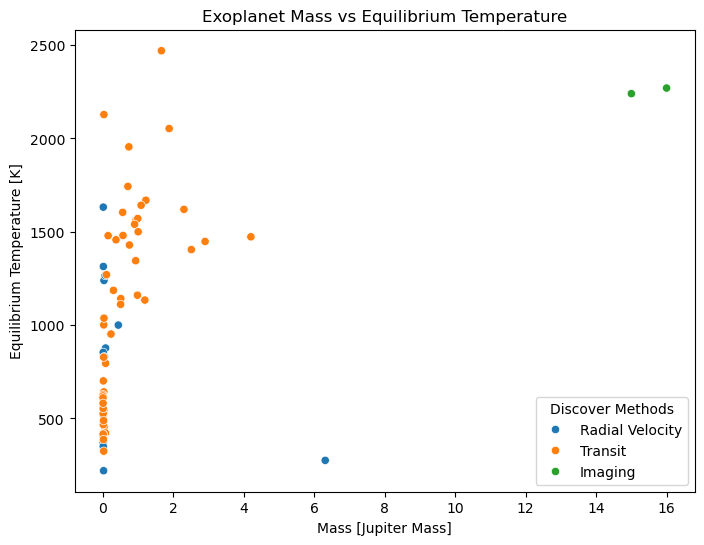

In [50]:
x = df['pl_name']
y = df['pl_eqt']

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_small, x = 'pl_bmassj', y = 'pl_eqt', hue = 'discoverymethod')
plt.title('Exoplanet Mass vs Equilibrium Temperature')
plt.xlabel('Mass [Jupiter Mass]')
plt.ylabel('Equilibrium Temperature [K]')
plt.legend(title = 'Discover Methods')
plt.show()

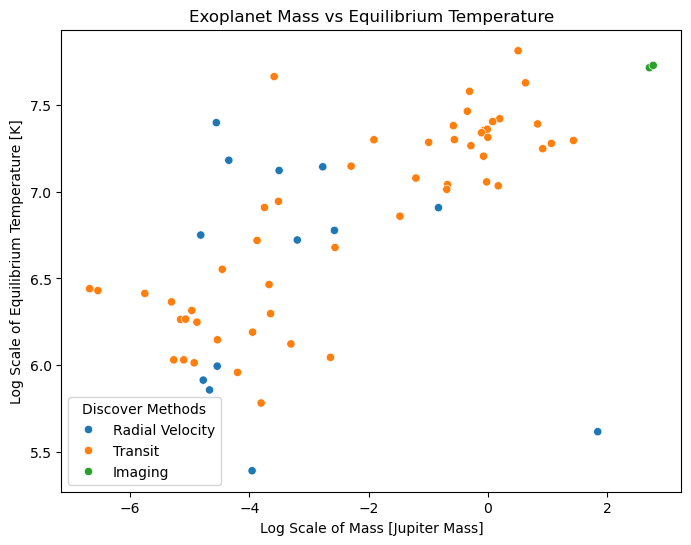

In [52]:
df_small['log_mass'] = np.log(df_small['pl_bmassj'])
df_small['log_temp'] = np.log(df_small['pl_eqt'])

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_small, x = 'log_mass', y = 'log_temp', hue = 'discoverymethod')
plt.title('Exoplanet Mass vs Equilibrium Temperature')
plt.xlabel('Log Scale of Mass [Jupiter Mass]')
plt.ylabel('Log Scale of Equilibrium Temperature [K]')
plt.legend(title = 'Discover Methods')
plt.show()
# exoplanets found via imaging are more likely to be massive

In [60]:
df_above5 = df_small[df_small['pl_bmassj'] > 5]
df_above5

,pl_name,hostname,discoverymethod,st_spectype,pl_eqt,pl_bmassj,log_mass,log_temp
481,USco1556 b,USco1556 A,Imaging,M3.0 V,2240.0,15.00,2.708050,7.714231
482,USco1621 b,USco1621 A,Imaging,M2.5 V,2270.0,16.00,2.772589,7.727535
566,eps Ind A b,eps Ind A,Radial Velocity,K5 V,275.0,6.31,1.842136,5.616771


In [74]:
lowest_temp = df_above5['pl_eqt'].idxmin()
print(lowest_temp)
df_above5.loc[566] 

566


pl_name                eps Ind A b
hostname                 eps Ind A
discoverymethod    Radial Velocity
st_spectype                   K5 V
pl_eqt                       275.0
pl_bmassj                     6.31
log_mass                  1.842136
log_temp                  5.616771
Name: 566, dtype: object